# Mathematische Modelle zur Beschreibung von Daten

Wir haben letzte Woche einen Datensatz von handgeschriebenen Ziffern eingelesen. Diese waren im csv-Format gespeichert. Wir haben die handgeschriebenen Ziffern visualisiert und eine Reihe an Statistiken auf den Daten berechnet. 

In einem anderen Notebook, haben wir uns Wahrscheinlichkeitsverteilungen angeschaut. Wir haben zu den Wahrscheinlichkeitsverteilungen Zufallszahlen generiert und diese zusammen mit den Wahrscheinlichkeitsdichtefunktionen visualisiert.

Anhand eines weiteren Datensatzes (https://datahub.io/core/global-temp#data) wollen wir nun die zwei Welten zusammenbringen und ein neues Datenformat (JSON) kennenlernen. Wir wollen diese Daten einlesen und anhand von mathematischen Modellfunktionen beschreiben. Bei dem Datensatz handelt es sich um die monatlichen Temperaturmittelwerte für die gesammte Erde.

---

In [17]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt

In [18]:
f = open("monthly_json.json", "r") # öffnet die Datei
file_content = f.read(500) # liest die ersten 100 Zeichen der Datei

In [19]:
file_content

'[{"Date": "2016-12-06", "Mean": 0.7895, "Source": "GCAG"},{"Date": "2016-12-06", "Mean": 0.81, "Source": "GISTEMP"},{"Date": "2016-11-06", "Mean": 0.7504, "Source": "GCAG"},{"Date": "2016-11-06", "Mean": 0.93, "Source": "GISTEMP"},{"Date": "2016-10-06", "Mean": 0.7292, "Source": "GCAG"},{"Date": "2016-10-06", "Mean": 0.89, "Source": "GISTEMP"},{"Date": "2016-09-06", "Mean": 0.8767, "Source": "GCAG"},{"Date": "2016-09-06", "Mean": 0.87, "Source": "GISTEMP"},{"Date": "2016-08-06", "Mean": 0.8998, '

Wie wir sehen, handelt es sich immernoch um eine Textdatei. Diese ist jedoch in einem grundsätzlich anderen Format aufgebaut. Jedoch gibt es auch hier bereits fertige Interpreter in pandas:

In [20]:
data = pd.read_json("monthly_json.json") 

In [21]:
data.head()

,Date,Mean,Source
0,2016-12-06,0.7895,GCAG
1,2016-12-06,0.8100,GISTEMP
2,2016-11-06,0.7504,GCAG
3,2016-11-06,0.9300,GISTEMP
4,2016-10-06,0.7292,GCAG


Zunächst will ich die Daten etwas umformatieren, so dass das Datum zum index des Dataframes wird und die verschiedenen Quellen (Source) als Spalten dargestellt werden. Dazu nutze ich die Pivot-Funktion von pandas:

In [22]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')

In [23]:
pivot_df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


Wie ich aus der Beschreibung der Daten weiß, handelt es sich um einen zeitlichen Verlauf der Temperaturmittelwerte. Diesen will ich zunächst einmal visualisieren um ein gefühl dafür zu bekommen.

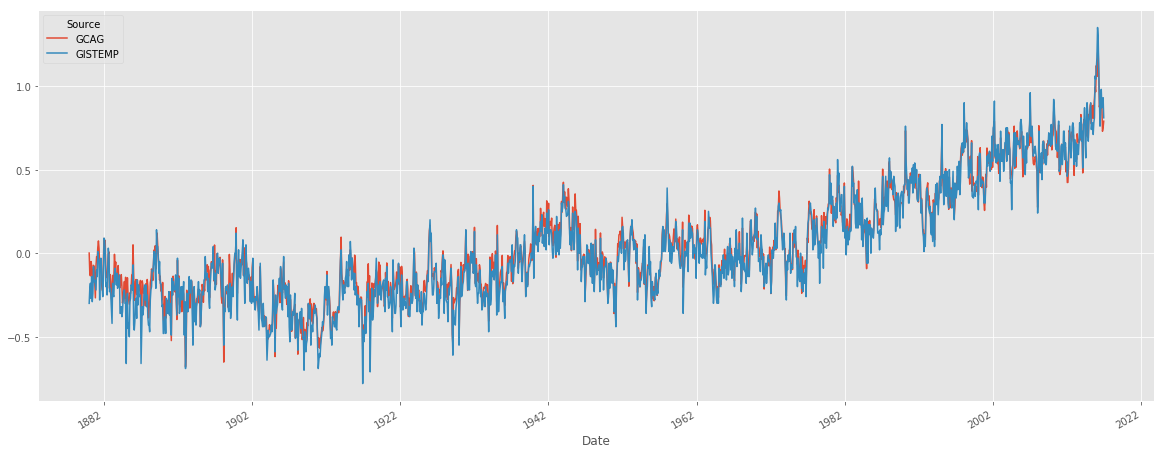

In [24]:
pivot_df.plot(figsize=(20, 8),);

Zuletzt bei den Verteilungen haben wir selbst generierte Daten in Zusammenhang mit ihren Wahrscheinlichkeitsdichtefunktionien gebracht. Nun versuche ich dasselbe mit den Temperaturdaten zu denen ich die Verteilung nicht kenne. Dazu visualisiere ich erstmal die Wertebereiche für 'GCAG' und 'GISTEMP' mit Hilfe eines normierten Histogramms.

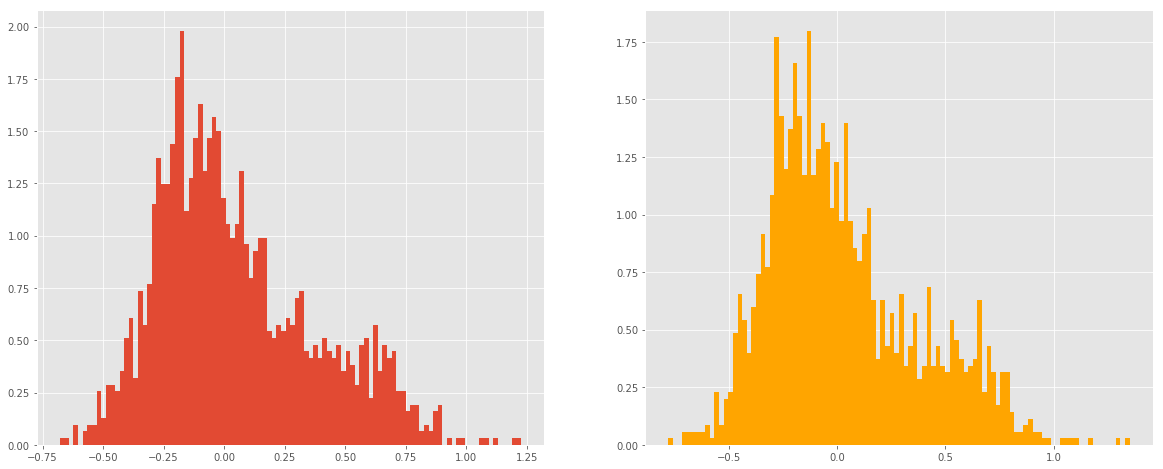

In [25]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df['GCAG'], bins=100, density=True)

plt.subplot(1,2, 2 )
plt.hist(pivot_df['GISTEMP'], bins=100, color='orange',density=True)

plt.show()

Und lasse mir ein paar Statistiken dazu ausgeben

In [26]:
pivot_df.describe()

Source,GCAG,GISTEMP
count,1644.000000,1644.000000
mean,0.048797,0.024380
std,0.326230,0.343709
min,-0.679600,-0.780000
25%,-0.190625,-0.230000
50%,-0.021650,-0.050000
75%,0.252150,0.230000
max,1.224500,1.350000


Auch wenn die Daten nicht ganz normalverteilt aussehen, will ich diese Wahrscheinlichkeitsdichtefunktion über die Werte plotten. Dazu nehme ich die Mittelwert und Standardabweichung aus dem describe() Ergebnis.

In [27]:
loc_gcag = 0.048797
scale_gcag = 0.326230
lower = scipy.stats.norm.ppf(0.01,loc_gcag,scale_gcag)
upper = scipy.stats.norm.ppf(0.99,loc_gcag,scale_gcag)
x_gcag = scipy.linspace(lower,upper,100)

y_gcag = scipy.stats.norm.pdf(x_gcag,loc_gcag,scale_gcag)

In [28]:
loc_gistemp = 0.024380
scale_gistemp = 0.343709
lower = scipy.stats.norm.ppf(0.01,loc_gistemp,scale_gistemp)
upper = scipy.stats.norm.ppf(0.99,loc_gistemp,scale_gistemp)
x_gistemp = scipy.linspace(lower,upper,100)

y_gistemp = scipy.stats.norm.pdf(x_gistemp,loc_gistemp,scale_gistemp)

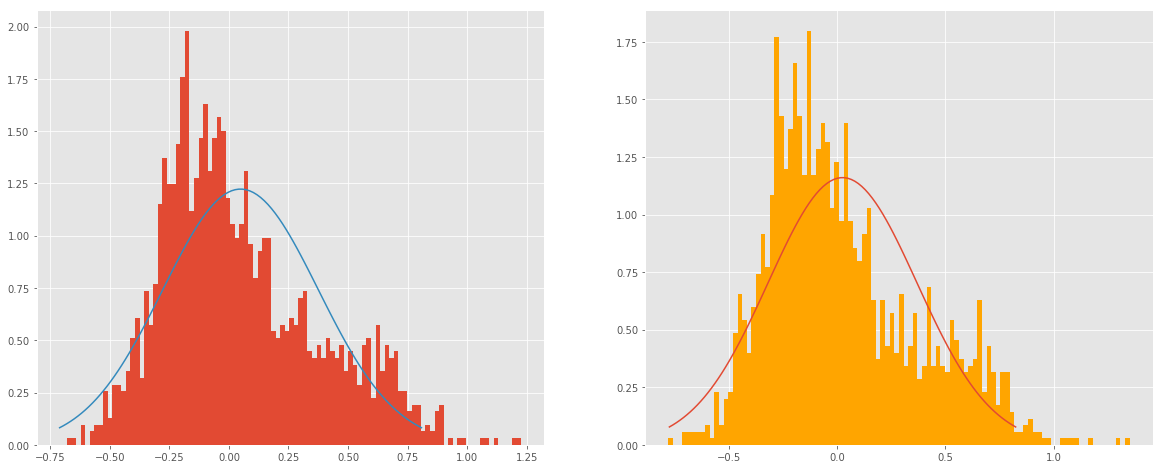

In [29]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df['GCAG'], bins=100, density=True)
plt.plot(x_gcag,y_gcag)

plt.subplot(1,2, 2 )
plt.hist(pivot_df['GISTEMP'], bins=100, density=True, color='orange')
plt.plot(x_gistemp,y_gistemp)

plt.show()

Wie unschwer zu erkennen ist, passt die Verteilung nicht genau auf die Daten und ist somit keine besonders gute Beschreibung der Daten.

** AUFGABE: ** Finde eine bessere Möglichkeit die Daten zu beschreiben

In [30]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [31]:

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
        # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

#mydata = list(pivot_df['GCAG'])
#print(best_fit_distribution(mydata)) #'exponnorm', (2.0072015529627123, -0.26590447032051867, 0.15678434153113419)

#mydata2 = list(pivot_df['GISTEMP'])
#print(best_fit_distribution(mydata2)) #('exponnorm', (2.02321555035417, -0.3064710951227213, 0.1635257989760851))


In [32]:
K = 2.0072015529627123
loc =-0.26590447032051867
scale = 0.15678434153113419
lower = scipy.stats.exponnorm.ppf(0.01,K,loc,scale)
upper = scipy.stats.exponnorm.ppf(0.99,K,loc,scale)
print(lower)
print(upper)
x_gcag = scipy.linspace(lower,upper,100)

y_gcag = scipy.stats.exponnorm.pdf(x_gcag,K,loc,scale)

-0.5148166870591365
1.2223877906045526


In [33]:
K_gistemp = 2.02321555035417
loc_gistemp = -0.3064710951227213 
scale_gistemp = 0.1635257989760851
lower = scipy.stats.exponnorm.ppf(0.01,K_gistemp,loc_gistemp,scale_gistemp)
upper = scipy.stats.exponnorm.ppf(0.99,K_gistemp,loc_gistemp,scale_gistemp)
x_gistemp = scipy.linspace(lower,upper,100)

y_gistemp = scipy.stats.exponnorm.pdf(x_gistemp,K_gistemp,loc_gistemp,scale_gistemp)

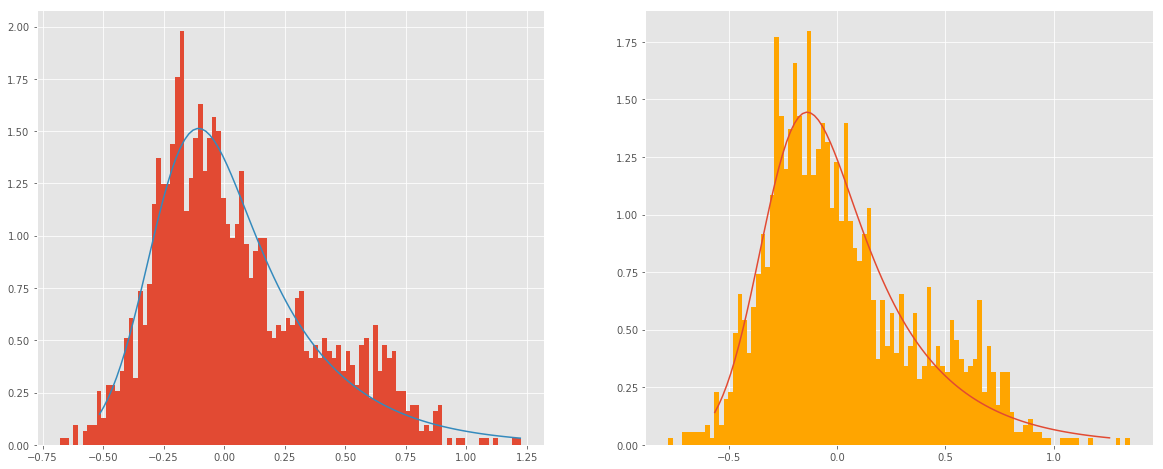

In [34]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df['GCAG'], bins=100, density=True)
plt.plot(x_gcag,y_gcag)


plt.subplot(1,2, 2 )
plt.hist(pivot_df['GISTEMP'], bins=100, density=True, color='orange')
plt.plot(x_gistemp,y_gistemp)

plt.show()

In [77]:
from sklearn.cluster import KMeans
from IPython.display import display, HTML
gcag = pivot_df[['GCAG']] # dataframe entsteht

gcag["dateix"] = range(0,gcag.shape[0])
#gcag = np.array(gcag)
display(gcag)
#KMeans = KMeans(n_clusters=2).fit(gcag.values.reshape(-1, 1)) # wenn gcag Series ist
#KMeans = KMeans(n_clusters=2).fit(gcag)
#plt.scatter(gcag.index,gcag, c=KMeans.labels_)

pandas.core.frame.DataFrame

In [59]:
gcag.values.reshape(-1, 1) # 1 column, inferred row value!

array([[ 0.0009],
       [-0.1229],
       [-0.1357],
       ...,
       [ 0.7292],
       [ 0.7504],
       [ 0.7895]])

In [61]:
gcag

Date
1880-01-06    0.0009
1880-02-06   -0.1229
1880-03-06   -0.1357
1880-04-06   -0.0499
1880-05-06   -0.0738
1880-06-06   -0.1692
1880-07-06   -0.1491
1880-08-06   -0.0725
1880-09-06   -0.0817
1880-10-06   -0.1786
1880-11-06   -0.2672
1880-12-06   -0.0775
1881-01-06   -0.0205
1881-02-06   -0.0296
1881-03-06    0.0348
1881-04-06    0.0734
1881-05-06    0.0284
1881-06-06   -0.0892
1881-07-06   -0.0329
1881-08-06   -0.0519
1881-09-06   -0.1824
1881-10-06   -0.2207
1881-11-06   -0.2194
1881-12-06   -0.0439
1882-01-06    0.0883
1882-02-06    0.0385
1882-03-06    0.0754
1882-04-06   -0.1241
1882-05-06   -0.1459
1882-06-06   -0.1391
               ...  
2014-07-06    0.6988
2014-08-06    0.7986
2014-09-06    0.7872
2014-10-06    0.7851
2014-11-06    0.6895
2014-12-06    0.8308
2015-01-06    0.8141
2015-02-06    0.8843
2015-03-06    0.8969
2015-04-06    0.7741
2015-05-06    0.8584
2015-06-06    0.8835
2015-07-06    0.8072
2015-08-06    0.8746
2015-09-06    0.9260
2015-10-06    0.9913
2015-11-

In [56]:
a = np.array([[1,2,3], [4,5,6]])
b = np.reshape(a, (-1,2)) 
b

array([[1, 2],
       [3, 4],
       [5, 6]])

---